In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pycaret
%matplotlib inline

In [2]:
#Reading the data
train = pd.read_csv('Loan.csv')

train.info


<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

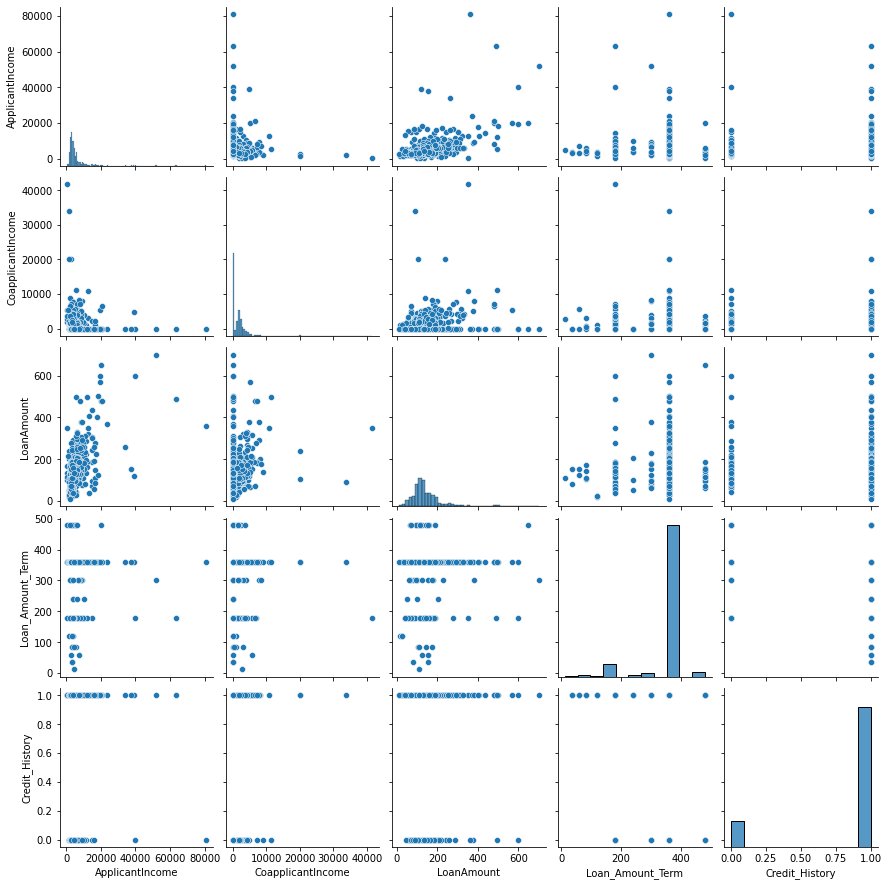

In [3]:
sns.pairplot(train) 


In [4]:
#making a copy 
train_original=train.copy()


In [5]:
#Exploring the data
train.columns
#loan status is the target class

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape

(614, 13)

Realtionship Between the types of variables


We have Three different types of variables in the dataset:
Categorical:Gender, Married, Self_Employed, Credit_History,     Loan_status
Ordinal:Dependents,Education,Property_area
Numerical:ApplicantIncome,Co-ApplicantIncome,LoanAmount,    Loan_amount_term

<AxesSubplot:xlabel='Gender'>

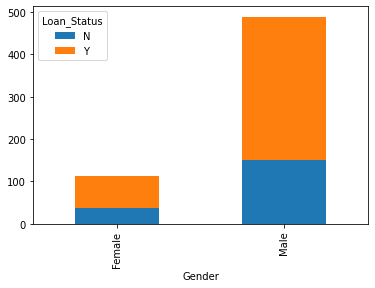

In [8]:
#Finding The Relationship between categorical and target variable
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.plot(kind='bar',stacked=True)


Here we see the loan approval rate of males is much greater than that of females

<AxesSubplot:xlabel='Self_Employed'>

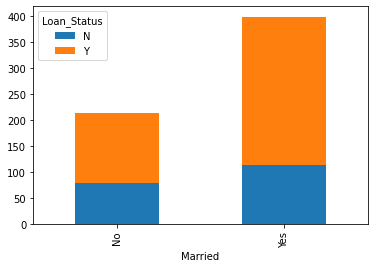

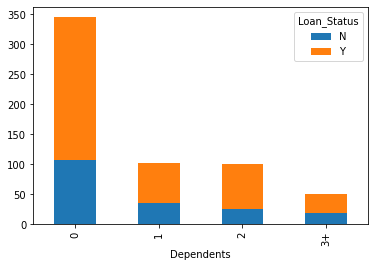

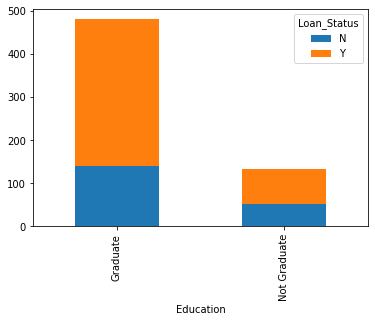

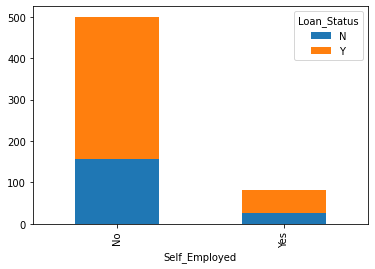

In [9]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])


Married.plot(kind='bar',stacked=True)
Dependents.plot(kind='bar',stacked=True)
Education.plot(kind='bar',stacked=True)
Self_Employed.plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Property_Area'>

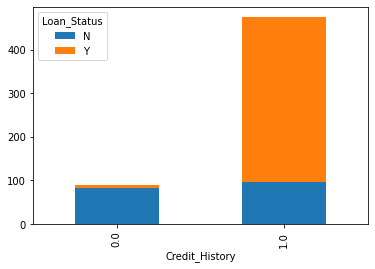

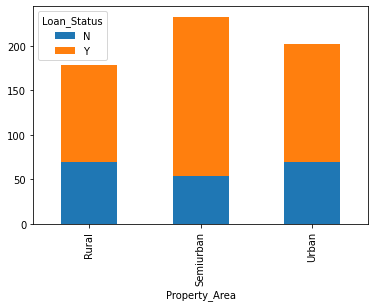

In [10]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.plot(kind='bar',stacked=True)

Property_Area.plot(kind='bar',stacked=True)


In [11]:
#Relationship Between Numerical and Target
#Correlation Between The Numerical Varibles

<AxesSubplot:>

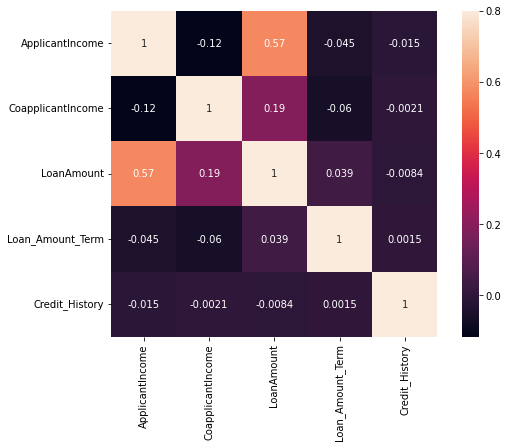

In [12]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,annot=True)

We see that the most correlated variables are (ApplicantIncome — LoanAmount) and (Credit_History — Loan_Status)

DATA CLEANING AND PREPROCESSING

Missing Value Handling

In [13]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#FILLING OUT MISSING VALUES For Categorical Variables

In [15]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [16]:
train['Loan_Amount_Term'].value_counts()
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [17]:
#Now the variable Loan_amount and Loan_amount_term is a numerical variable so filling out the missing values

In [18]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [19]:
#checking the Train dataset for any remaining missing values
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
#
train=pd.get_dummies(train,drop_first=True)
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


MODEL CONSTRUCTION

In [21]:
#train.drop('Loan_ID',axis=1,inplace=True)

In [22]:
#Dropping the Loan_ID variable
#train=train.drop('Loan_ID',axis=1)

df1= pd.DataFrame(train)

df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [23]:
#Building The model
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

from sklearn.model_selection import train_test_split
#Splitting the trian dataset into train and test data 
X = df1.drop('Loan_Status_Y',axis=1)
y = df1['Loan_Status_Y']
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

lr.fit(x_train,y_train)




c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
pred = lr.predict(x_cv)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_cv,pred))

              precision    recall  f1-score   support

           0       0.97      0.54      0.69        63
           1       0.81      0.99      0.89       122

    accuracy                           0.84       185
   macro avg       0.89      0.77      0.79       185
weighted avg       0.86      0.84      0.82       185



c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


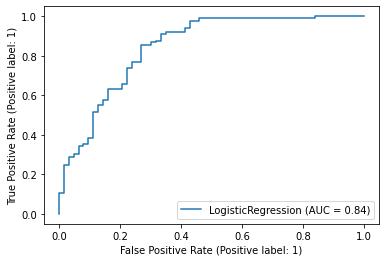

In [27]:
metrics.plot_roc_curve(lr,x_cv,y_cv)

In [28]:
from sklearn.tree import DecisionTreeClassifier
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [29]:
dtree= DecisionTreeClassifier()
X=df1.drop('Loan_Status_Y',axis=1)
y1=df1['Loan_Status_Y']
X_train,X_test,y1_train,y1_test=train_test_split(X,y1,test_size=0.44,random_state=130)

In [30]:
dtree.fit(X_train,y1_train)

DecisionTreeClassifier()

In [31]:
pred1= dtree.predict(X_test)

In [32]:
print(classification_report(y1_test,pred1))

              precision    recall  f1-score   support

           0       0.73      0.51      0.60        78
           1       0.82      0.92      0.87       193

    accuracy                           0.80       271
   macro avg       0.78      0.72      0.74       271
weighted avg       0.80      0.80      0.79       271



In [33]:
accuracy_score(y1_test,pred1)

0.8044280442804428

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


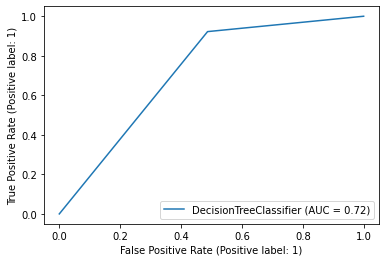

In [34]:
metrics.plot_roc_curve(dtree,X_test,y1_test)

In [35]:

# from IPython.display import Image  
# from six import StringIO  
# from sklearn.tree import export_graphviz
# import pydot

# features = list(df1.columns[1:-1])
# features

In [36]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(n_estimators=192)

In [39]:
rf.fit(X_train,y1_train)


RandomForestClassifier(n_estimators=192)

In [40]:
pred2= rf.predict(X_test)

In [41]:
print(confusion_matrix(y1_test,pred2))
print(classification_report(y1_test,pred2))

[[ 31  47]
 [  2 191]]
              precision    recall  f1-score   support

           0       0.94      0.40      0.56        78
           1       0.80      0.99      0.89       193

    accuracy                           0.82       271
   macro avg       0.87      0.69      0.72       271
weighted avg       0.84      0.82      0.79       271



In [42]:
accuracy_score(y1_test,pred2)

0.8191881918819188

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


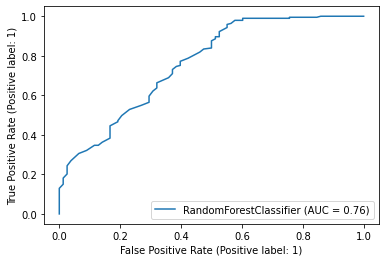

In [43]:
metrics.plot_roc_curve(rf,X_test,y1_test)

The Best Performing Model was RandomForest Classifier


In [44]:
final_csv = pd.DataFrame(pred2,columns=['pred2'])
final_csv['Loan_Status']=train['Loan_Status_Y']
final_csv

,pred2,Loan_Status
0,1,1
1,1,0
2,0,1
3,0,1
4,1,1
...,...,...
266,1,1
267,1,1
268,1,0
269,1,1


In [207]:
# final_csv.to_csv('Predictions.csv')